---
title: "Diabetes EDA Practice"
author: "Laura Vairus"
date: "2023-07-03"
---

In [1]:
import numpy as np  # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis

import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the dataset's data to a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Show the DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# finds the number of columns in the dataset
total_cols=len(df.axes[1])
print("Number of Columns: "+str(total_cols))

Number of Columns: 11


In [9]:
# finds the number of rows in the dataset
total_rows = len(df.axes[0])
print("Number of Rows: "+str(total_rows))

Number of Rows: 442


In [10]:
print('The dimension of the DataFrame is: ', df.ndim)

The dimension of the DataFrame is:  2


In [11]:
df.size

4862

In [12]:
#The info() function is used to print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [13]:
# checking for missing values (null)
#functions that return a boolean value indicating whether the passed in argument value is in fact missing data.
# this is an example of chaining methods

df.isnull().values.any()

False

In [14]:
#it can also output if there is any missing values each of the columns

df.isnull().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

In [24]:
# We should find the summary statistics for all variables except 'outcome' in the dataset. 
# It is our output variable in our case. 
# Summary statistics of data represent descriptive statistics. 
# Descriptive statistics include those that summarize:
# the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. 

df.iloc[:,0:10].describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


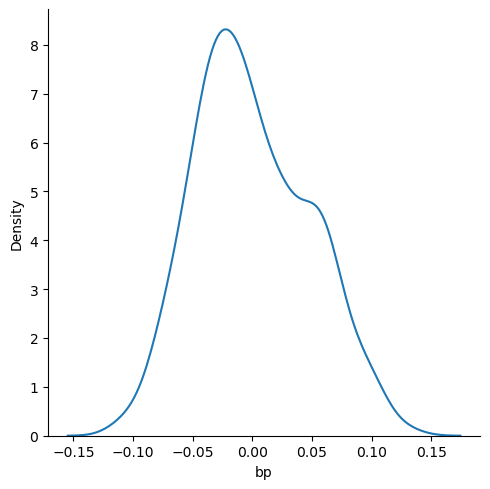

In [19]:
sns.displot(df['bp'], kind='kde')
plt.show()

In [38]:
df[df['s6']==df['s6'].max()]['bmi']
print(df.loc[[23]])
print(df.loc[[117]])
print(df.loc[[350]])
# 177 350

         age      sex       bmi        bp        s1        s2        s3  \
23  0.045341  0.05068  0.060618  0.031065  0.028702 -0.047347 -0.054446   

         s4        s5        s6  target  
23  0.07121  0.133597  0.135612   245.0  
          age       sex       bmi        bp        s1        s2        s3  \
117  0.059871 -0.044642 -0.021295  0.087287  0.045213  0.031567 -0.047082   

          s4        s5        s6  target  
117  0.07121  0.079122  0.135612   281.0  
         age      sex       bmi        bp        s1        s2        s3  \
350 -0.02731  0.05068  0.060618  0.107944  0.012191 -0.017598 -0.002903   

           s4        s5        s6  target  
350 -0.002592  0.070207  0.135612   243.0  


In [39]:
# mean 
m1 = df['bmi'].mean() 
print(m1) 

# median 
m2 = df['bmi'].median() 
print(m2)

# mode  
m3 = df['bmi'].mode()[0] 
print(m3)

-2.2455642172282577e-16
-0.007283766209687899
-0.03099563183506548


In [41]:
# How many women's Glucose levels are above the mean level of Glucose 
# mean() method finds the mean of all numerical values in a series or column.
v1 = df[df['s6']>df['s6'].mean()].shape[0]
print(v1)

# count the number of women that have their 'BloodPressure' equal to the median of 'BloodPressure' 
v2 = df[df['bp']==df['bp'].median()].shape[0]
print(v2)

# and their 'BMI' less than the median of 'BMI'
v3 = df[df['bmi']<df['bmi'].median()].shape[0]
print(v3)

218
21
218


In [46]:
df1 = df[(df['bp']==df['bp'].median()) & (df['bmi']<df['bmi'].median())]
number_of_patients=len(df1.axes[0])
print("Number of patients: " +str(number_of_patients))

Number of patients: 9


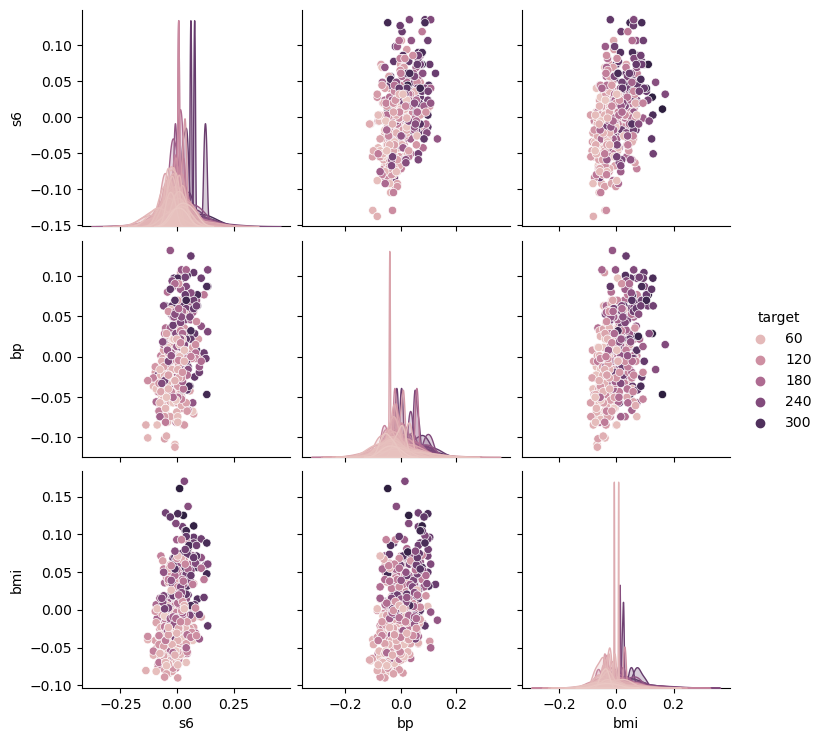

In [49]:
# Getting a pairwise distribution between Glucose, Skin thickness and Diabetes pedigree function.
sns.pairplot(data=df,vars=['s6', 'bp', 'bmi'], hue = 'target')
plt.show()

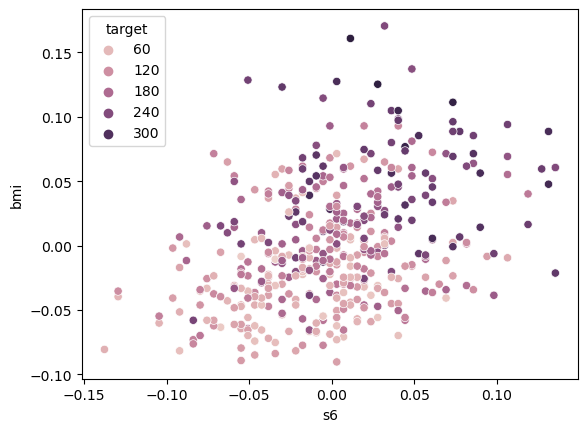

In [50]:
# Studying the correlation between glucose and insulin using a Scatter Plot.
sns.scatterplot(x='s6',y='bmi',data=df, hue = 'target')
plt.show()

In [ ]:
# The scatter plot above implies that mostly the increase in glucose does relatively little change in insulin levels 
# It also shows that in some the increase in glucose increases in insulin. 
# This could probably be outliers.

# Let us explore the possibility of outliers using the Box Plot.
# Boxplot is a way to visualize the five-number summary of the variable. 
# Boxplot gives information about the outliers in the data.

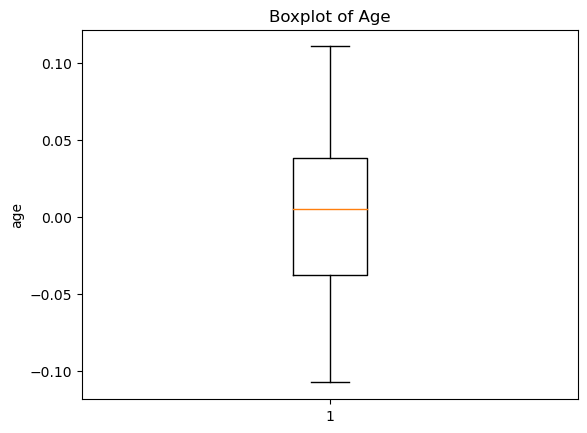

In [51]:
plt.boxplot(df['age'])

plt.title('Boxplot of Age')
plt.ylabel('age')
plt.show()
# The box plot shows the presence of outliers above the horizontal line.

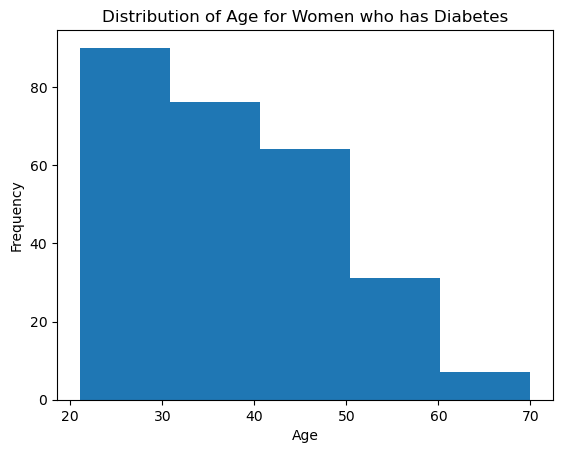

In [41]:
# Understanding the number of women in different age groups with diabetes.
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Of all the women with diabetes most are from the age between 22 to 30.
# The frequency of women with diabetes decreases as age increases.

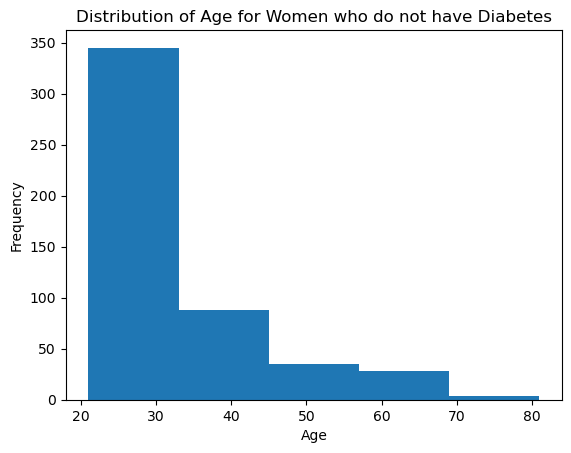

In [42]:
# understanding the number of women in different age groups without diabetes.

plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# The highest number of Women without diabetes range between ages 22 to 33.
# Women between the age of 22 to 35 are at the highest risk of diabetes 
# and also the is the highest number of those without diabetes.

In [43]:
# The IQR or Inter Quartile Range is a statistical measure for the variability in a given data.
# It is a methodology that is generally used to filter outliers in a dataset

Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [52]:
# Correlation is a statistic that measures the degree to which two variables move with each other.
corr_matrix = df.iloc[:,0:10].corr()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


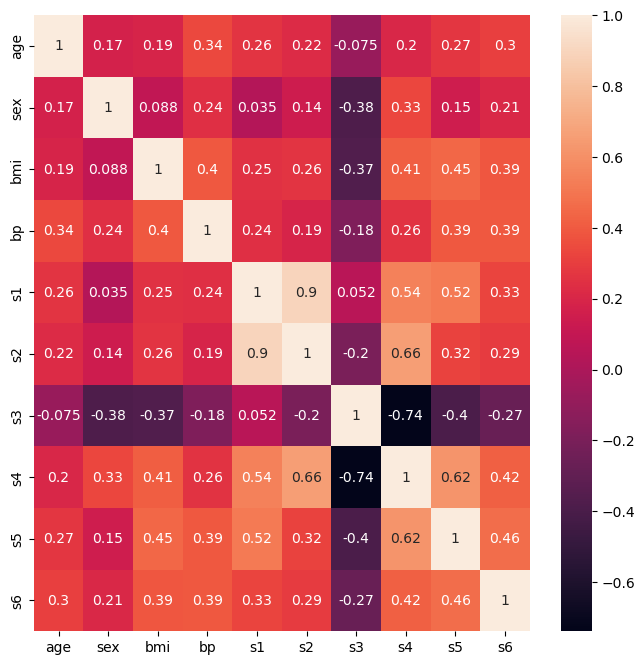

In [53]:
# 'annot=True' returns the correlation values
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

In [54]:
# The closer the correlation is to 1, the more positively correlated they are; 
# that is as one increases so does the other and the closer to 1 the stronger this relationship is.
# A correlation closer to -1 is similar,
# but instead of both increasing one variable will decrease as the other increases.